In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame,Series
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#data = pd.read_csv('‪D:\Data\UCI Datasets\winequality-red.csv',sep = ';')
data = pd.read_csv('D:\Data\UCI Datasets\winequality-red.csv',sep = ';')

In [3]:
data.shape

(1599, 12)

In [4]:
data.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
data.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [6]:
data.columns.tolist()

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [9]:
# # data['Quality_Type'] = np.where(data['quality'] > 5,3,4)
# def get_target_quality(data) : 
#     if  7 <= data  :
#         return 1
#     if 7 <= data <= 5  :
#         return 2
#     if data == 3 :
#         return 3
#     if data == 4 :
#         return "Poor"

 #a= np.where(data['quality'] > 7.5) 

#data[data['quality'] > 7.5]['Quality_Type'] = 'Excellent'

# data.loc[data['quality'] > 7.5, 'Quality_Type'] = 1

# data['Quality_Type'].value_counts()

 #b= (np.where(data['quality'] <= 5.0) and np.where(data['quality'] > 2.5) )

#data.ix[b]['Quality_Type'] = 'Poor'
# data.loc[(data["quality"] > 2.5) & (data["quality"] < 5.0), "Quality_Type"] = 2

# data['Quality_Type'].value_counts()

# def get_target_quality(data) : 
#     if data == 1 :
#         return "Excellent"
#     if data == 2 :
#         return "Good"
#     if data == 3 :
#         return "OK"
#     if data == 4 :
#         return "Poor"

# data['QType'] = data.quality.map(get_target_quality)

In [7]:
features = ['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']
target = ['quality']

In [9]:
import warnings
warnings.filterwarnings('ignore')

### most correlated features

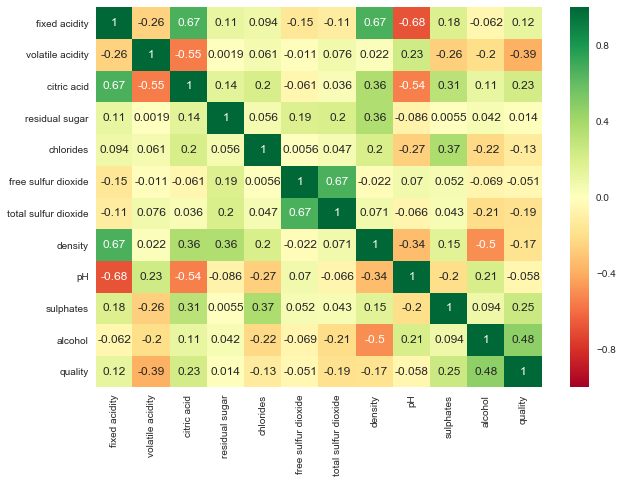

In [14]:
import seaborn as sns
corrmat = data.corr()
plt.figure(figsize = (10,7))
# or fig, ax = plt.subplots(figsize=(20, 10))
#top_corr_features = corrmat.index[abs(corrmat["quality"])>0.2]
g = sns.heatmap(data.corr(),annot=True,cmap="RdYlGn")

In [17]:
corrmat.sort_values(["quality"], ascending = False, inplace = True)
print(corrmat.quality)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


Alchol contributes highest to the quality of a fine wine and volatile acidity negatively affects the wine quality

In [18]:
print("NAs for features in whole data : " + str(data.isnull().values.sum()))

NAs for features in whole data : 0


## Skewness

In [57]:
from scipy.stats import skew 
skewness = data.apply(lambda x:skew(x.dropna()))
skewness = skewness[abs(skewness) > 0.5]
skewness

volatile acidity        0.670962
residual sugar          1.019251
chlorides               3.427354
free sulfur dioxide    -1.042670
total sulfur dioxide   -0.600474
sulphates               0.695695
alcohol                 0.581647
dtype: float64

In [58]:
skew_features = data[skewness.index]
skew_features[:2]

,volatile acidity,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol
0,0.70,0.308426,0.062019,0.382474,0.407504,0.215917,0.377974
1,0.88,0.326306,0.075977,0.401735,0.418232,0.232684,0.379197


In [59]:
skew_features  = np.log1p(skew_features)


In [60]:
data[skew_features.columns] = skew_features

In [67]:
print("NAs for numerical features in data : " + str(data.isnull().values.sum()))


NAs for numerical features in data : 0


In [63]:
from sklearn.model_selection import train_test_split # to split the data into two parts
train, test = train_test_split(data,random_state = 0)
#Fill the training and test data with require information
X_train = train[features] 
y_train = train[target]
X_test = test[features]
y_test = test[target]


In [53]:

# from sklearn.preprocessing import MinMaxScaler
# sc = MinMaxScaler()
# train_x_std = sc.fit_transform(X_train)
# test_x_std = sc.transform(X_test)


## Linear Regression

In [64]:
from sklearn.linear_model import LinearRegression


linreg = LinearRegression().fit(X_train, y_train)

print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

linear model coeff (w): [[  16.42799542   -1.84948136   -0.33365396    3.09954857   -4.01903599
     3.25826414   -7.73666789  -46.74829239   -0.25961867   12.43335175
   126.35075057]]
R-squared score (training): 0.370
R-squared score (test): 0.364


In [25]:
# plt.figure(figsize=(5,4))
# plt.scatter(X_train, y_train, marker= 'o', s=50, alpha=0.8)
# plt.plot(data['features'], linreg.coef_ * X_R1 + linreg.intercept_, 'r-')
# plt.title('Least-squares linear regression')
# plt.xlabel('Feature value (x)')
# plt.ylabel('Target value (y)')
# plt.show()

## With Standard Features Normalization

In [73]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
train_x_std = sc.fit_transform(X_train)
test_x_std = sc.transform(X_test)

linreg = LinearRegression().fit(train_x_std, y_train)

print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(train_x_std, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(test_x_std, y_test)))

linear model coeff (w): [[ 0.62460793 -1.54331954 -0.33365396  0.31767155 -0.76443764  0.37734313
  -0.39691062 -0.63671174 -0.32971571  1.32361446  1.44352094]]
R-squared score (training): 0.370
R-squared score (test): 0.364


In [74]:
from sklearn.neighbors import KNeighborsRegressor

knnreg = KNeighborsRegressor(n_neighbors = 5).fit(train_x_std, y_train)

#\print(knnreg.predict(X_test))
print('R-squared test score: {:.3f}'
     .format(knnreg.score(test_x_std, y_test)))

R-squared test score: 0.220


## Ridge Regression

In [28]:
from sklearn.linear_model import Ridge
linridge = Ridge(alpha=20.0).fit(train_x_std, y_train)

In [29]:
linridge.score(test_x_std, y_test)

0.29365528041934941

#### Let's find a erfect alpha for Ridge

In [68]:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
ridge = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])
ridge.fit(X_train,y_train)
alpha = ridge.alpha_
print('best alpha',alpha)


('best alpha', 0.01)


In [69]:
ridge = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4],cv = 5)
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

('Best alpha :', 0.0060000000000000001)


In [70]:
y_train_rdg = ridge.predict(X_train)
y_test_rdg = ridge.predict(X_test)
ridge.score(X_test,y_test)

0.31359534107847187

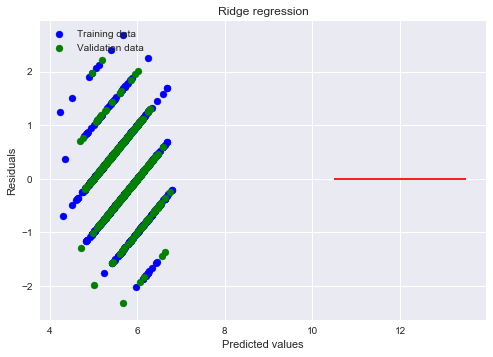

In [71]:
plt.scatter(y_train_rdg, y_train_rdg - y_train, c = "blue",  label = "Training data")
plt.scatter(y_test_rdg,y_test_rdg - y_test, c = "green",  label = "Validation data")
plt.title("Ridge regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

In [76]:
print('Wine dataset')

print('ridge regression linear model intercept: {}'
     .format(ridge.intercept_))
print('ridge regression features: {}'
     .format(features))
print('ridge regression linear model coeff:\n{}'
     .format(ridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(ridge.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(ridge.score(X_test, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(ridge.coef_ != 0)))
print('Number of zero features: {}'
     .format(np.sum(ridge.coef_ == 0)))


Wine dataset
ridge regression linear model intercept: [ 13.867503]
ridge regression features: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
ridge regression linear model coeff:
[[  3.48099296e+00  -1.93395141e+00  -4.83900193e-02   3.81624591e+00
   -6.41408865e+00   4.20261227e+00  -1.34444085e+01  -2.47341825e+01
   -1.86097725e-01   1.36712385e+01   5.07069309e+01]]
R-squared score (training): 0.338
R-squared score (test): 0.314
Number of non-zero features: 11
Number of zero features: 0


In [78]:

from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [79]:
from sklearn.linear_model import Ridge
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

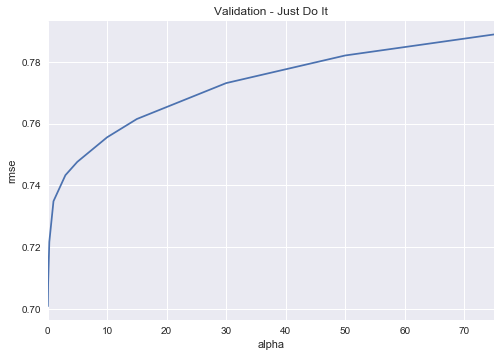

In [82]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")

### Ridge is not for this dataset

In [77]:
# print('Ridge regression: effect of alpha regularization parameter\n')
# for this_alpha in [0, 1, 10, 20, 50, 100, 1000]:
#     linridge = Ridge(alpha = this_alpha).fit(train_x_std, y_train)
#     r2_train = linridge.score(train_x_std, y_train)
#     r2_test = linridge.score(test_x_std, y_test)
#     num_coeff_bigger = np.sum(abs(linridge.coef_) > 1.0)
#     print('Alpha = {:.2f}\nnum abs(coeff) > 1.0: {}, \
# r-squared training: {:.2f}, r-squared test: {:.2f}\n'
#          .format(this_alpha, num_coeff_bigger, r2_train, r2_test))

## Lasso Regression

In [ ]:
# from sklearn.linear_model import Lasso
# linlasso = Lasso(alpha=1.0, max_iter = 10000).fit(train_x_std, y_train)

In [83]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


#lasso = Lasso(random_state=0)
alphas = np.logspace(-4, -0.5, 30)

tuned_parameters = [{'alpha': alphas}]
n_folds = 3
#lasso_cv = LassoCV(alphas=alphas, random_state=0)
lasso_cv = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y_train)

lasso_cv.fit(X_train, y_train)
lasso_cv.score(X_train, y_train)
#lasso_cv.predict(X_test)

0.25985937675670834

In [84]:
print('Wine dataset')
print('lasso regression linear model intercept: {}'
     .format(lasso_cv.intercept_))
print('lasso regression linear model coeff:\n{}'
     .format(lasso_cv.coef_))
print('Non-zero features: {}'
     .format(np.sum(lasso_cv.coef_ != 0)))
print('R-squared score (training): {:.3f}'
     .format(lasso_cv.score(train_x_std, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(lasso_cv.score(test_x_std, y_test)))
print('Features with non-zero weight (sorted by absolute magnitude):')

for e in sorted (list(zip(list(X_train), lasso_cv.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))

Wine dataset
lasso regression linear model intercept: 5.2854221215
lasso regression linear model coeff:
[ -0.          -2.19034307   0.05264839   0.25729065  -6.06239469  -0.
  -5.54545049  -0.           0.03357653  11.65130391   3.04341218]
Non-zero features: 8
R-squared score (training): -5.434
R-squared score (test): -4.715

Features with non-zero weight (sorted by absolute magnitude):
	sulphates, 11.651
	chlorides, -6.062
	total sulfur dioxide, -5.545
	alcohol, 3.043
	volatile acidity, -2.190
	residual sugar, 0.257
	citric acid, 0.053
	pH, 0.034


## Logistic Regression

In [89]:
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV

clf = LogisticRegressionCV(Cs=list(np.power(10.0, np.arange(-10, 10)))).fit(X_train, y_train)

print("Best C :", clf.C_)
print('Wine dataset')
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

('Best C :', array([  1.00000000e+05,   1.00000000e+05,   1.00000000e+06,
         1.00000000e+00,   1.00000000e+06,   1.00000000e-10]))
Wine dataset
Accuracy of Logistic regression classifier on training set: 0.60
Accuracy of Logistic regression classifier on test set: 0.62


In [98]:
print('Logistic regression: effect of C regularization parameter\n')
for this_c in [0.1, 1, 100,500,1000]:
    linridge = LogisticRegression(C = this_c).fit(train_x_std, y_train)
    r2_train = linridge.score(train_x_std, y_train)
    r2_test = linridge.score(test_x_std, y_test)
    print('C = {:.2f}, \
r-squared training: {:.2f}, r-squared test: {:.2f}\n'
         .format(this_c, r2_train, r2_test))

Logistic regression: effect of C regularization parameter

C = 0.10, r-squared training: 0.56, r-squared test: 0.60

C = 1.00, r-squared training: 0.59, r-squared test: 0.61

C = 100.00, r-squared training: 0.60, r-squared test: 0.62

C = 500.00, r-squared training: 0.60, r-squared test: 0.61

C = 1000.00, r-squared training: 0.60, r-squared test: 0.61



In [35]:
clf.predict([ 0.25892857,  0.21232877,  0.29      ,  0.08219178,  0.10517529,
        0.25352113,  0.21201413,  0.52202643,  0.51968504,  0.16564417,
        0.16923077])

C:\Users\jinda\Anaconda2\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([5], dtype=int64)

## Linear SVC

In [36]:
from sklearn.svm import LinearSVC

clf = LinearSVC().fit(train_x_std, y_train)
print('Accuracy of Linear SVC classifier on training set: {:.2f}'
     .format(clf.score(train_x_std, y_train)))
print('Accuracy of Linear SVC classifier on test set: {:.2f}'
     .format(clf.score(test_x_std, y_test)))
print('Coefficients:\n', clf.coef_)
print('Intercepts:\n', clf.intercept_)

Accuracy of Linear SVC classifier on training set: 0.58
Accuracy of Linear SVC classifier on test set: 0.62
('Coefficients:\n', array([[ 0.17895561,  0.67589671, -0.20440618,  0.15802829,  0.48236659,
         0.08153061, -0.5814566 , -0.03783692,  0.17687611, -0.16181418,
        -0.13173679],
       [ 0.34820055,  0.67184739,  0.14835802,  0.26680566,  0.17157542,
         0.02444577, -0.35403359, -0.45770168,  0.48037265, -0.02023479,
        -0.29074006],
       [-0.89607071,  0.81011054,  0.22471513, -0.63013182,  0.66167174,
        -0.45112021,  1.91195214,  0.72631956, -0.26615914, -1.69635352,
        -1.78419783],
       [-0.36216818, -0.91042944, -0.5607197 , -0.4503886 , -0.23761216,
         0.53655536, -1.34695591,  0.90590225, -0.50301456,  0.57396076,
         0.93435023],
       [ 1.00837469, -1.43185926, -0.02627224,  0.91288793, -0.73317848,
        -0.08696231, -0.62111601, -1.02268755,  0.4940871 ,  1.30649891,
         1.03851621],
       [-0.34990649,  0.07445299

In [37]:
data.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

## Kernalized SVC

In [38]:
from sklearn.svm import SVC
# Support Vector Classifier: RBF kernel
clf = SVC().fit(train_x_std, y_train)
print('Accuracy of Linear SVC classifier on training set: {:.2f}'
     .format(clf.score(train_x_std, y_train)))
print('Accuracy of Linear SVC classifier on test set: {:.2f}'
     .format(clf.score(test_x_std, y_test)))

Accuracy of Linear SVC classifier on training set: 0.56
Accuracy of Linear SVC classifier on test set: 0.58


In [39]:
# Support Vector Classifier: Poly kernel
clf = SVC(kernel = 'poly', degree = 3).fit(train_x_std, y_train)
print('Accuracy of Linear SVC classifier on training set: {:.2f}'
     .format(clf.score(train_x_std, y_train)))
print('Accuracy of Linear SVC classifier on test set: {:.2f}'
     .format(clf.score(test_x_std, y_test)))

Accuracy of Linear SVC classifier on training set: 0.43
Accuracy of Linear SVC classifier on test set: 0.42


In [40]:
print('SVC RBF: effect of  regularization parameter gamma\n')
for this_gamma in [0.01, 1, 10,50,100,120,150]:
    clf = SVC(    kernel = 'rbf', gamma=this_gamma).fit(train_x_std, y_train)
    r2_train = clf.score(train_x_std, y_train)
    r2_test = clf.score(test_x_std, y_test)
    print('Gamma = {:.2f}, \
r-squared training: {:.2f}, r-squared test: {:.2f}\n'
         .format(this_gamma, r2_train, r2_test))


SVC RBF: effect of  regularization parameter gamma

Gamma = 0.01, r-squared training: 0.43, r-squared test: 0.42

Gamma = 1.00, r-squared training: 0.59, r-squared test: 0.60

Gamma = 10.00, r-squared training: 0.71, r-squared test: 0.62

Gamma = 50.00, r-squared training: 0.92, r-squared test: 0.67

Gamma = 100.00, r-squared training: 0.98, r-squared test: 0.66

Gamma = 120.00, r-squared training: 0.98, r-squared test: 0.63

Gamma = 150.00, r-squared training: 0.99, r-squared test: 0.60



In [41]:
print('SVC RBF: effect of  regularization parameter gamma and C \n')
for this_gamma in [1, 10,50,100]:
    for this_C in [0.1, 1, 15]:
        
        clf = SVC(    kernel = 'rbf', gamma=this_gamma, C = this_C).fit(train_x_std, y_train)
        r2_train = clf.score(train_x_std, y_train)
        r2_test = clf.score(test_x_std, y_test)
        print('Gamma = {:.2f},C = {:.2f} \
        r-squared training: {:.2f}, r-squared test: {:.2f}\n'
         .format(this_gamma,this_C, r2_train, r2_test))

SVC RBF: effect of  regularization parameter gamma and C 

Gamma = 1.00,C = 0.10         r-squared training: 0.57, r-squared test: 0.59

Gamma = 1.00,C = 1.00         r-squared training: 0.59, r-squared test: 0.60

Gamma = 1.00,C = 15.00         r-squared training: 0.66, r-squared test: 0.61

Gamma = 10.00,C = 0.10         r-squared training: 0.59, r-squared test: 0.60

Gamma = 10.00,C = 1.00         r-squared training: 0.71, r-squared test: 0.62

Gamma = 10.00,C = 15.00         r-squared training: 0.92, r-squared test: 0.63

Gamma = 50.00,C = 0.10         r-squared training: 0.43, r-squared test: 0.42

Gamma = 50.00,C = 1.00         r-squared training: 0.92, r-squared test: 0.67

Gamma = 50.00,C = 15.00         r-squared training: 1.00, r-squared test: 0.64

Gamma = 100.00,C = 0.10         r-squared training: 0.43, r-squared test: 0.42

Gamma = 100.00,C = 1.00         r-squared training: 0.98, r-squared test: 0.66

Gamma = 100.00,C = 15.00         r-squared training: 1.00, r-squared t

## Decision Tree Classifier

In [47]:
from sklearn.tree import DecisionTreeClassifier

for this_depth in [2,4,8,16,20,25,26,27,28]:
    clf = DecisionTreeClassifier(max_depth = this_depth)
    dtree = clf.fit(X_train,y_train)
    print('Max depth: {:.2f} R Squared train data: {:.2f}, R Squared test data {:.2f}\n'.format(this_depth,dtree.score(X_train,y_train),dtree.score(X_test,y_test)))
    

Max depth: 2.00 R Squared train data: 0.55, R Squared test data 0.53

Max depth: 4.00 R Squared train data: 0.61, R Squared test data 0.56

Max depth: 8.00 R Squared train data: 0.77, R Squared test data 0.59

Max depth: 16.00 R Squared train data: 0.99, R Squared test data 0.64

Max depth: 20.00 R Squared train data: 1.00, R Squared test data 0.61

Max depth: 25.00 R Squared train data: 1.00, R Squared test data 0.62

Max depth: 26.00 R Squared train data: 1.00, R Squared test data 0.62

Max depth: 27.00 R Squared train data: 1.00, R Squared test data 0.64

Max depth: 28.00 R Squared train data: 1.00, R Squared test data 0.63

